In [2]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

In [ ]:
# light intensity, mW/mm^2
I = 1
# absorption coefficient (mm^2/mW)s^-1
a = 1
# concentration of cage, M
c = 0.0001

def dL_dt(L, t):
    return(-a*I*L+a*I*c)

ts = np.linspace(0,5,100)
L0 = 0.0  # the initial condition
Ls = odeint(dL_dt, L0, ts)
Ls = np.array(Ls).flatten()



In [10]:
# light intensity, mW/mm^2
I = 1
# absorption coefficient (mm^2/mW)s^-1
a = 1
# concentration of cage, M
c = 0.0001
ts = np.linspace(0,10,100)
Ls = c*(1-np.exp(-a*I*ts))

k_off = 1/50 # 1/ms
k_on = 1e4 # 1/M ms

off = [0.1, 0.01, 0.005]
on = [1e5, 1e4, 2e3]

def dO_dt(O, t):
    Lt = c*(1-np.exp(-a*I*t))
    return(-(k_off + k_on*Lt)*O+k_on*Lt)
    #return(-a*I*L+a*I*c)

O_0 = 0.0  # the initial condition
Os = odeint(dO_dt, O_0, ts)
Os = np.array(Os).flatten()
      

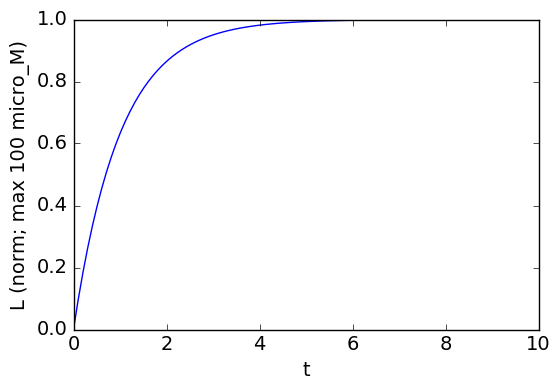

In [9]:
# Plot the concentration of ligand
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("t")
plt.ylabel("L (norm; max 100 micro_M)")
plt.plot(ts, Ls*10000);

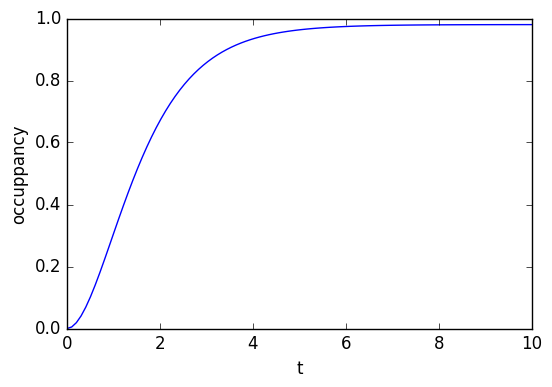

In [11]:
# Plot the concentration of ligand
plt.rcParams.update({'font.size': 12})  # increase the font size
plt.xlabel("t")
plt.ylabel("occuppancy")
plt.plot(ts, Os);

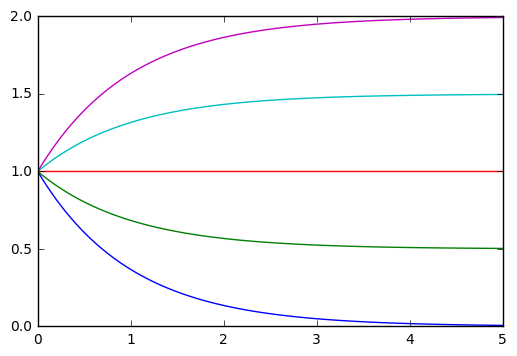

In [31]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

ts=np.linspace(0,5, 100)
y0 = 1.0
beta = [0, 0.5, 1, 1.5, 2.0]

def dy_dt(y, t, a, b):
    return(-a*y+b)

for b_param in beta:
    ys = odeint(dy_dt, y0, ts, (1, b_param))
    ys = np.array(ys).flatten()
            
    #plt.rcParams.update({'font.size': 14})  # increase the font size
    #plt.xlabel("x")
    #plt.ylabel("y")
    plt.plot(ts, ys);
    
plt.show()


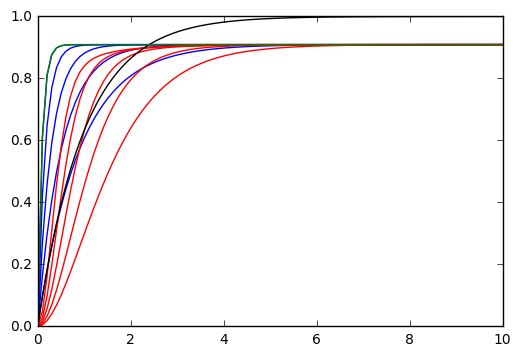

In [22]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

from scipy.integrate import odeint

# light intensity, mW/mm^2
I = 1
# absorption coefficient (mm^2/mW)s^-1
a = 1
# concentration of cage, M
c = 0.0001
ts = np.linspace(0,10,100)
Ls = c*(1-np.exp(-a*I*ts))

#k_off = 1/50 # 1/ms
#k_on = 1e4 # 1/M ms

Kd = 1e-5
kon= np.logspace(4, 5, num=5, base=10)
kin = []
for on in kon:
    kin.append((on, Kd*on))

O_0 = 0.0  # the initial condition

#def dO_dt(O, t, k_on, k_off):
#    return(-(k_off + k_on*Ls)*O+k_on*Ls)

def dO_dt(O, t, k_on, k_off):
    Lt = c
    return(-(k_off + k_on*Lt)*O+k_on*Lt)

for ki in kin:
    Os = odeint(dO_dt, O_0, ts, ki)
    Os = np.array(Os).flatten()
    plt.plot(ts, Os, 'b'); 

#plt.plot(ts, 0.9)
    
def dO_dt(O, t, k_on, k_off):
    Lt = c*(1-np.exp(-a*I*t))
    return(-(k_off + k_on*Lt)*O+k_on*Lt)

for ki in kin:
    Os = odeint(dO_dt, O_0, ts, ki)
    Os = np.array(Os).flatten()
    plt.plot(ts, Os, 'r');    
    
plt.plot(ts, Ls*10000, 'k')
plt.plot(ts, (1e-4/(1e-5+1e-4))*(1-np.exp(-(1e5*1e-4+1)*ts)), 'g')

plt.show()    
    

In [9]:
Os[-1]

0.90908678156888834

In [11]:
1e4/(1e5+1e4)

0.09090909090909091

In [13]:
1e-4

0.0001

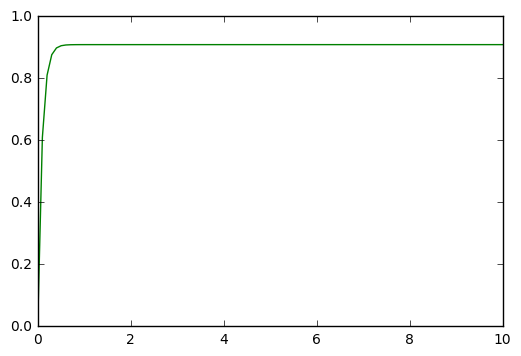

In [21]:
plt.plot(ts, (1e-4/(1e-5+1e-4))*(1-np.exp(-(1e5*1e-4+1)*ts)), 'g')

plt.show()

In [23]:
ki

(100000.0, 1.0)

In [24]:
kin


[(10000.0, 0.10000000000000001),
 (17782.794100389227, 0.17782794100389229),
 (31622.776601683792, 0.31622776601683794),
 (56234.132519034909, 0.56234132519034918),
 (100000.0, 1.0)]